# Forest Species Analysis

We examined the presence of forest specialist species captured using point counts (PC), autonomous recording units (ARU) and citizen science (Kenya Bird Map (KBM)) at DeKUWC and MKNP. Forest dependency is a measure of the relative condition of the forest. Using the list of forest species from Kenya and Uganda and the classification of species as forest specialists (FF), forest generalists (F) or forest visitors (f), we classify the observed species as either FF, F or f.

In [1]:
import os
import random
import numpy as np
import pandas as pd
import scipy 

from scipy import stats

import matplotlib.pyplot as plt

from matplotlib_venn import venn2, venn3

In [2]:
# Kenyan Species

# scientific names
df_sp = pd.read_csv('../annotations/Kenya-Species-List.csv')
# common name
kenyan_sp_cn = list(df_sp['Common Name'])
# scientific name
kenyan_sp_sn = list(df_sp['Scientific Name'])


# Forest Species
forest_df = pd.read_csv('../annotations/forest-birds-KE-UG.csv')

In [3]:
np.random.seed(1234)
random.seed(1234)

In [4]:
def species_from_df(df):
    sps = []
    for i in range(len(df)):
        if not pd.isna(df.iloc[i]['Foreground Species']):
            sps += df.iloc[i]['Foreground Species'].split(';')
        if not pd.isna(df.iloc[i]['Background Species']):
            sps += df.iloc[i]['Background Species'].split(';')
    return list(set(sps))


In [5]:
def forest_species(species_list):
    FF = 0
    F = 0
    f = 0
    other = 0
    
    specialists = []
    generalists = []
    visitors = []
    
    for sp in species_list:
        curr_df = forest_df[forest_df['Scientific name']==sp]
        if len(curr_df):
            #print(curr_df.iloc[0]['English name'], curr_df.iloc[0]['Cat'], curr_df.iloc[0]['Dist'])
            if curr_df.iloc[0]['Cat'] == 'FF':
                FF += 1
                specialists.append(sp)
            elif curr_df.iloc[0]['Cat'] == 'F':
                F += 1
                generalists.append(sp)
            elif curr_df.iloc[0]['Cat'] == 'f':
                f += 1
                visitors.append(sp)
        else:
            #print(sp, '*****')
            other += 1
    total = FF+F+f+other
    print('FF = {}, F = {}, f = {}, other = {}, Total = {}'.format(FF, F, f, other, total))
    print('FF = {}, F = {}, f = {}, other = {}'.format(FF / total, F / total, f / total, other / total))

    return specialists, generalists, visitors

# MKNP

In [6]:
# MKNP
mknp_pc = pd.read_csv('../annotations/mknp-pc-2017-2018.csv')
mknp_pc_species = list(mknp_pc['Unnamed: 0'])

In [7]:
mknp_pc_species_sn = [kenyan_sp_sn[kenyan_sp_cn.index(sp)] for indx, sp in enumerate(mknp_pc_species)]
mknp_s_pc, mknp_g_pc, mknp_v_pc = forest_species(mknp_pc_species_sn)

FF = 13, F = 12, f = 5, other = 18, Total = 48
FF = 0.2708333333333333, F = 0.25, f = 0.10416666666666667, other = 0.375


In [8]:
# mknp audio
mknp_aru = pd.read_csv('../annotations/mknp-aru-2017-2018.csv')
mknp_aru_species = species_from_df(mknp_aru)

mknp_aru_species_sn = [kenyan_sp_sn[kenyan_sp_cn.index(sp)] for indx, sp in enumerate(mknp_aru_species)]
mknp_s_aru, mknp_g_aru, mknp_v_aru = forest_species(mknp_aru_species_sn)

FF = 5, F = 10, f = 5, other = 15, Total = 35
FF = 0.14285714285714285, F = 0.2857142857142857, f = 0.14285714285714285, other = 0.42857142857142855


In [9]:
# mknp kbm
mknp_kbm = pd.read_csv('../annotations/mknp-kbm.csv')
mknp_kbm_species = list(mknp_kbm['Unnamed: 0'])

mknp_kbm_species_sn = [kenyan_sp_sn[kenyan_sp_cn.index(sp)] for indx, sp in enumerate(mknp_kbm_species)]
mknp_s_kbm, mknp_g_kbm, mknp_v_kbm = forest_species(mknp_kbm_species_sn)

FF = 20, F = 19, f = 16, other = 70, Total = 125
FF = 0.16, F = 0.152, f = 0.128, other = 0.56


# DeKUWC

In [10]:
dekuwc_pc = pd.read_csv('../annotations/dekuwc-pc-2017.csv')
dekuwc_pc_species = list(dekuwc_pc['Unnamed: 0'])

dekuwc_pc_species_sn = [kenyan_sp_sn[kenyan_sp_cn.index(sp)] for indx, sp in enumerate(dekuwc_pc_species)]
dekuwc_s_pc, dekuwc_g_pc, dekuwc_v_pc = forest_species(dekuwc_pc_species_sn)

FF = 3, F = 9, f = 10, other = 35, Total = 57
FF = 0.05263157894736842, F = 0.15789473684210525, f = 0.17543859649122806, other = 0.6140350877192983


In [11]:
pfiles = os.listdir('../annotations/')
# audio 
dekuwc_audio_species = []
for pfile in pfiles:
    if 'pc' not in pfile and 'kbm' not in pfile and 'dekuwc' in pfile and pfile.endswith('csv'):
        df = pd.read_csv(os.path.join('../annotations/', pfile))
        dekuwc_audio_species += species_from_df(df)

dekuwc_audio_species = list(set(dekuwc_audio_species))
dekuwc_audio_species.sort()

dekuwc_audio_species_sn = [kenyan_sp_sn[kenyan_sp_cn.index(sp)] for indx, sp in enumerate(dekuwc_audio_species)]
dekuwc_s_aru, dekuwc_g_aru, dekuwc_v_aru = forest_species(dekuwc_audio_species_sn)

FF = 7, F = 17, f = 19, other = 46, Total = 89
FF = 0.07865168539325842, F = 0.19101123595505617, f = 0.21348314606741572, other = 0.5168539325842697


In [12]:
dekuwc_kbm = pd.read_csv('../annotations/dekuwc-kbm.csv')
dekuwc_kbm_species = list(dekuwc_kbm['Unnamed: 0'])

dekuwc_kbm_species_sn = [kenyan_sp_sn[kenyan_sp_cn.index(sp)] for indx, sp in enumerate(dekuwc_kbm_species)]
dekuwc_s_kbm, dekuwc_g_kbm, dekuwc_v_kbm = forest_species(dekuwc_kbm_species_sn)

FF = 17, F = 19, f = 21, other = 167, Total = 224
FF = 0.07589285714285714, F = 0.08482142857142858, f = 0.09375, other = 0.7455357142857143


# Figure 7

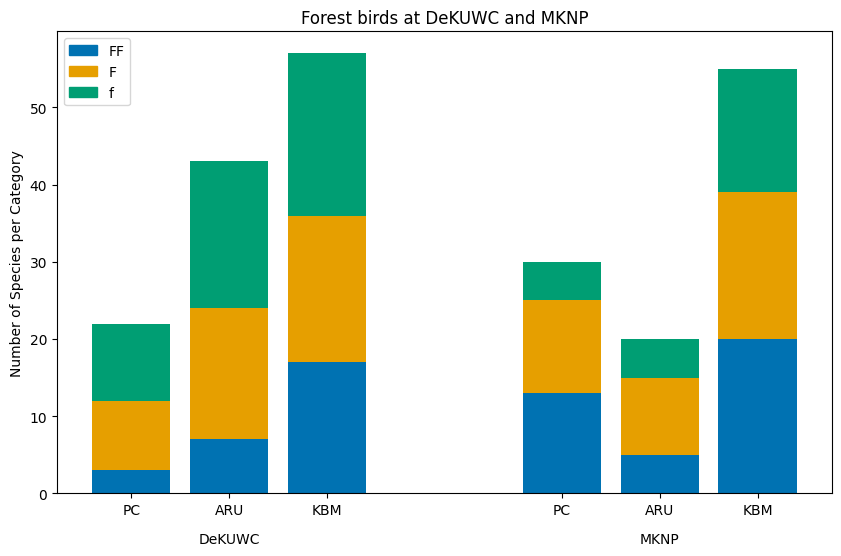

In [13]:
# Example data
categories = ['DeKUWC', 'MKNP']
subcategories = ['FF', 'F', 'f']
values1 = [
    [len(dekuwc_s_pc), len(dekuwc_g_pc), len(dekuwc_v_pc)],
    [len(mknp_s_pc), len(mknp_g_pc), len(mknp_v_pc)]
   
]
values2 = [
    [len(dekuwc_s_aru), len(dekuwc_g_aru), len(dekuwc_v_aru)],
    [len(mknp_s_aru), len(mknp_g_aru), len(mknp_v_aru)]
   
]
values3 = [
    [len(dekuwc_s_kbm), len(dekuwc_g_kbm), len(dekuwc_v_kbm)],
    [len(mknp_s_kbm), len(mknp_g_kbm), len(mknp_v_kbm)]
   
]

# Setting the bar width
bar_width = 0.2
# Adjust the spacing between groups
x = np.arange(len(categories)) * 1.1

# Adding a small offset to separate bars within the group
bar_offset = 0.05

ticks = np.vstack((x - bar_width - bar_offset, x, x + bar_width + bar_offset)).flatten(order='F')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Colors for each stack
colors = ['#FF9999', '#66B2FF', '#99FF99']
colors = ['#0072B2', '#E69F00', '#009E73']
colors = ['#0072B2', '#E69F00', '#009E73', '#D55E00']


# Plotting the stacked bars for each subcategory with a small offset
for i in range(len(subcategories)):
    ax.bar(x - bar_width - bar_offset, [val[i] for val in values1], bar_width, color=colors[i], label=f'{subcategories[i]} - Group 1',
           bottom=[sum(val[:i]) for val in values1])
    ax.bar(x, [val[i] for val in values2], bar_width, color=colors[i], label=f'{subcategories[i]} - Group 2',
           bottom=[sum(val[:i]) for val in values2])
    ax.bar(x + bar_width + bar_offset, [val[i] for val in values3], bar_width, color=colors[i], label=f'{subcategories[i]} - Group 3',
           bottom=[sum(val[:i]) for val in values3])

# Adding labels and title
#ax.set_xlabel('Site')
ax.set_ylabel('Number of Species per Category')
ax.set_title('Forest birds at DeKUWC and MKNP')
ax.set_xticks(ticks)
ax.set_xticklabels(['PC', 'ARU', 'KBM', 'PC', 'ARU', 'KBM'] )

handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(subcategories))]
ax.legend(handles, subcategories)
#ax.legend(['PC', 'ARU', 'KBM'])

for i in range(len(categories)):
    ax.text(x[i], -5, categories[i], ha='center', va='top')
    


plt.savefig('forest-birds.jpg', dpi=300)
